# Logistic regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


def load_data():
    """Load breast cancer dataset.
    - ref: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
    """
    return load_breast_cancer()


def construct_logistic_regression(input_x, input_y):
    """Construct Logistic Regression classifier model.
    ref
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    """
    return LogisticRegression(random_state=0).fit(
        input_x,
        input_y
    )


def plot_scatter(
    target,
    x_direcsion_col: str,
    y_direction_col: str,
    y_elements,
    title: str = ''
) -> None:
    """Visulalize data scatter."""
    plt.scatter(
        target[x_direcsion_col],
        target[y_direction_col],
        c=y_elements
    )
    plt.title(title)
    plt.xlabel(x_direcsion_col)
    plt.ylabel(y_direction_col)
    plt.show()


In [2]:
# Prepare dataset.
df = pd.DataFrame(
    load_data().data,
    columns=load_data().feature_names
)
df['y'] = load_data().target

display(df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
target_df = df[
    ['mean radius', 'mean texture', 'y']
]
display(target_df.describe())

,mean radius,mean texture,y
count,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.627417
std,3.524049,4.301036,0.483918
min,6.981000,9.710000,0.000000
25%,11.700000,16.170000,0.000000
50%,13.370000,18.840000,1.000000
75%,15.780000,21.800000,1.000000
max,28.110000,39.280000,1.000000


Each count are same number, so there seems to be NO __missing values__.

In [4]:
display(target_df.corr())

,mean radius,mean texture,y
mean radius,1.000000,0.323782,-0.730029
mean texture,0.323782,1.000000,-0.415185
y,-0.730029,-0.415185,1.000000


__Correlations__ between the variables used seem to be just right.

In [5]:
# Check the number of categories for the objective variable.
print(target_df['y'].unique())

[0 1]


In [6]:
print(len(
    df.loc[target_df['y'] == 0]
))
print(len(
    df.loc[target_df['y'] == 1]
))

212
357


The category ratios are well balanced.

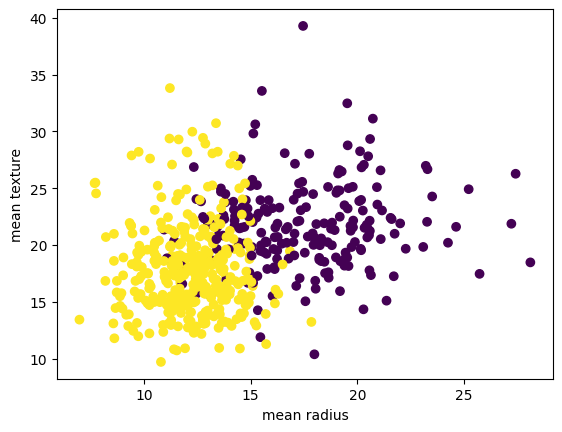

In [7]:
# Visulalize data scatter.
plot_scatter(
    target_df,
    'mean radius',
    'mean texture',
    target_df['y']
)

In [8]:
# Split the data into Explanatory and Objective variables.
X = target_df[
    ['mean radius', 'mean texture']
]
y = target_df[
    'y'
]

display(X.head())
display(y.head())

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [9]:
# Split dataset into training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

print(f'X_train length: {len(X_train)}')
display(X_train.head())
print(f'\nX_test length: {len(X_test)}')
display(X_test.head())

X_train length: 398


,mean radius,mean texture
478,11.490,14.59
303,10.490,18.61
155,12.250,17.94
186,18.310,18.58
101,6.981,13.43



X_test length: 171


,mean radius,mean texture
512,13.40,20.52
457,13.21,25.25
439,14.02,15.66
298,14.26,18.17
37,13.03,18.42


In [10]:
# Align data scales.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:5])
print(X_test_scaled[:5])

[[-0.74998027 -1.09978744]
 [-1.02821446 -0.1392617 ]
 [-0.53852228 -0.29934933]
 [ 1.14757693 -0.14642981]
 [-2.00453824 -1.37695407]]
[[-0.21855296  0.31710749]
 [-0.27141746  1.44727832]
 [-0.04604776 -0.84412512]
 [ 0.02072845 -0.24439387]
 [-0.32149961 -0.18465969]]


In [11]:
# Construct Logistic Regression classifier model.
logistic_regression = construct_logistic_regression(
    X_train_scaled,
    y_train
)

In [12]:
# Show predicted values.
y_train_predict = logistic_regression.predict(X_train_scaled)
y_test_predict = logistic_regression.predict(X_test_scaled)

print(f'y_train_predict: {len(y_train_predict)}\n{y_train_predict}\n')
print(f'y_test_predict: {len(y_test_predict)}\n{y_test_predict}')

y_train_predict: 398
[1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1
 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1
 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1
 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1]

y_test_predict: 171
[1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0


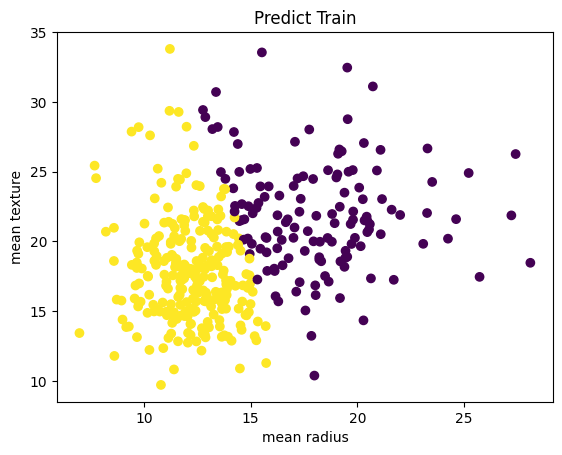

In [13]:
# Plot predict train results.
plot_scatter(
    X_train,
    'mean radius',
    'mean texture',
    y_train_predict,
    'Predict Train'
)

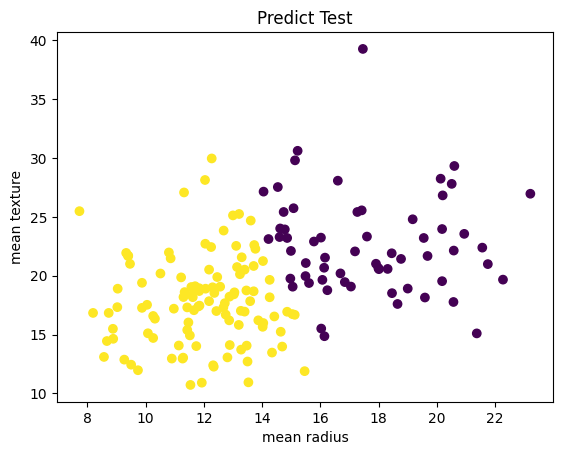

In [14]:
# Plot predict train results.
plot_scatter(
    X_test,
    'mean radius',
    'mean texture',
    y_test_predict,
    'Predict Test'
)

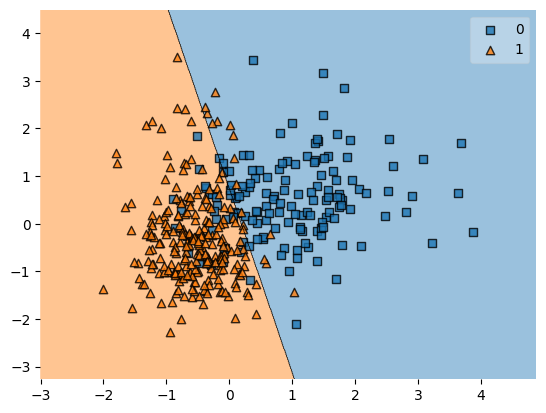

In [15]:
# Plot the Logistic Regression Decision region.
plot_decision_regions(
    np.array(X_train_scaled),
    np.array(y_train),
    clf=logistic_regression
)
plt.show()